In [2]:
import pandas as pd
import networkx as nx

In [2]:
data = pd.read_excel('/Users/sahithirao/Desktop/NetworkScience/Project/GSDB_V3/GSDB_V3.xls')
df=data.copy(deep=True)
df.tail()


,case_id,sanctioned_state,sanctioning_state,begin,end,trade,descr_trade,arms,military,financial,travel,other,target_mult,sender_mult,objective,success
1319,1320,Uganda,United States,2022,2022,1,"exp_part, imp_part",0,0,1,0,0,0,0,policy_change,ongoing
1320,1321,Ukraine,United Kingdom,2022,2022,0,NaN,0,0,1,0,0,0,0,end_war,ongoing
1321,1322,United Arab Emirates,United States,2022,2022,1,"exp_part, imp_part",0,0,1,0,0,0,0,terrorism,ongoing
1322,1323,United States,China,2022,2022,0,NaN,0,0,0,1,0,0,0,policy_change,ongoing
1323,1324,United States,Russia,2022,2022,1,"exp_part, imp_part",0,0,1,1,1,0,0,policy_change,ongoing


In [35]:
[df['success'][99]][0].split(',')

['success_part', 'success_part']

### CLEANING

In [41]:
trade_li =[]
arms_li =[]
military_li =[]
financial_li =[]
travel_li =[]
other_li =[]
trade_ob =[]
arms_ob =[]
military_ob =[]
financial_ob =[]
travel_ob =[]
other_ob =[]
for i in range(len(df)):
    count = df['trade'][i] + df['arms'][i] + df['military'][i] + df['financial'][i] + df['travel'][i] + df['other'][i]
    temp_success = [df['success'][i]][0].split(',')
    temp_objective=[df['objective'][i]][0].split(',')
    #print(i)
    
    if count == len(temp_success):
        pass
    else:
        diff = count - len(temp_success)
        for j in range(diff):
            temp_success.append(temp_success[-1])
            temp_objective.append(temp_objective[-1])
    
    count1 = 0
    if df['trade'][i] == 1:
        trade_li.append(temp_success[count1])
        trade_ob.append(temp_objective[count1])
        count1 = count1+1
    else:
        trade_li.append('NA')
        trade_ob.append('NA')
    if df['arms'][i] == 1:
        arms_li.append(temp_success[count1])
        arms_ob.append(temp_objective[count1])
        count1 = count1+1
    else:
        arms_li.append('NA')
        arms_ob.append('NA')
    if df['military'][i] == 1:
        military_li.append(temp_success[count1])
        military_ob.append(temp_objective[count1])
        count1 = count1+1
    else:
        military_li.append('NA')
        military_ob.append('NA')
    if df['financial'][i] == 1:
        financial_li.append(temp_success[count1])
        financial_ob.append(temp_objective[count1])
        count1 = count1+1
    else:
        financial_li.append('NA')
        financial_ob.append('NA')
    if df['travel'][i] == 1:
        travel_li.append(temp_success[count1])
        travel_ob.append(temp_objective[count1])
        count1 = count1+1
    else:
        travel_li.append('NA')
        travel_ob.append('NA')
    if df['other'][i] == 1:
        other_li.append(temp_success[count1])
        other_ob.append(temp_objective[count1])
        count1 = count1+1
    else:
        other_li.append('NA')
        other_ob.append('NA')
        
    

In [42]:
df['trade_suc'] = trade_li
df['arms_suc'] = arms_li
df['military_suc'] = military_li
df['financial_suc'] = financial_li
df['travel_suc'] = travel_li
df['other_suc'] = other_li
df['trade_obj'] = trade_ob
df['arms_obj'] = arms_ob
df['military_obj'] = military_ob
df['financial_obj'] = financial_ob
df['travel_obj'] = travel_ob
df['other_obj'] = other_ob

In [43]:
df.head()

,case_id,sanctioned_state,sanctioning_state,begin,end,trade,descr_trade,arms,military,financial,...,military_suc,financial_suc,travel_suc,other_suc,trade_obj,arms_obj,military_obj,financial_obj,travel_obj,other_obj
0,1,German Democratic Republic,Germany,1949,1973,0,NaN,0,0,0,...,NA,NA,NA,success_total,NA,NA,NA,NA,NA,territorial_conflict
1,2,Pakistan,India,1949,1951,1,"exp_compl, imp_compl",0,0,0,...,NA,NA,NA,NA,policy_change,NA,NA,NA,NA,NA
2,3,Bulgaria,United States,1950,1966,0,NaN,0,0,0,...,NA,NA,NA,failed,NA,NA,NA,NA,NA,destab_regime
3,4,Bulgaria,United States,1950,1959,0,NaN,0,0,0,...,NA,NA,success_part,NA,NA,NA,NA,NA,destab_regime,NA
4,5,Bulgaria,United States,1950,1963,0,NaN,0,0,1,...,NA,success_part,NA,NA,NA,NA,NA,destab_regime,NA,NA


In [44]:
df.head()

,case_id,sanctioned_state,sanctioning_state,begin,end,trade,descr_trade,arms,military,financial,...,military_suc,financial_suc,travel_suc,other_suc,trade_obj,arms_obj,military_obj,financial_obj,travel_obj,other_obj
0,1,German Democratic Republic,Germany,1949,1973,0,NaN,0,0,0,...,NA,NA,NA,success_total,NA,NA,NA,NA,NA,territorial_conflict
1,2,Pakistan,India,1949,1951,1,"exp_compl, imp_compl",0,0,0,...,NA,NA,NA,NA,policy_change,NA,NA,NA,NA,NA
2,3,Bulgaria,United States,1950,1966,0,NaN,0,0,0,...,NA,NA,NA,failed,NA,NA,NA,NA,NA,destab_regime
3,4,Bulgaria,United States,1950,1959,0,NaN,0,0,0,...,NA,NA,success_part,NA,NA,NA,NA,NA,destab_regime,NA
4,5,Bulgaria,United States,1950,1963,0,NaN,0,0,1,...,NA,success_part,NA,NA,NA,NA,NA,destab_regime,NA,NA


In [40]:
#TO CHECK IS BOTH COLUMNS HAVE SAME NUMBER OF VALUES
for i in range(len(df)):
    c1=len(df['objective'][i].split(','))
    c2=len(df['success'][i].split(','))
    if(c1!=c2):
        print(i+1)
        print(df['objective'][i],df['success'][i])

In [35]:
a=new_df['sanctioning_state'][46].split(',')
len(a)

1

In [38]:
#TO CHECK IS BOTH COLUMNS HAVE SAME NUMBER OF VALUES----------------------------
for i in range(len(df)):
    c1=len(new_df['sanctioning_state'][i].split(','))
    c2=len(new_df['sanctioned_state'][i].split(','))
    if(c1!=c2):
        #print(i+1)
        print(df.iloc[i+1])
        

In [28]:
df.iloc[1275]

case_id                      1276
sanctioned_state     Burkina Faso
sanctioning_state          ECOWAS
begin                        2022
end                          2022
trade                           0
descr_trade                   NaN
arms                            0
military                        0
financial                       0
travel                          0
other                           1
target_mult                     0
sender_mult                     1
objective               democracy
success                   ongoing
Name: 1275, dtype: object

In [31]:
df.set_index('case_id', inplace=True)

In [32]:
df.reset_index(inplace=True)


In [33]:
df

,case_id,sanctioned_state,sanctioning_state,begin,end,trade,descr_trade,arms,military,financial,travel,other,target_mult,sender_mult,objective,success
0,1,German Democratic Republic,Germany,1949,1973,0,NaN,0,0,0,0,1,0,0,territorial_conflict,success_total
1,2,Pakistan,India,1949,1951,1,"exp_compl, imp_compl",0,0,0,0,0,0,0,policy_change,nego_settlement
2,3,Bulgaria,United States,1950,1966,0,NaN,0,0,0,0,1,0,0,destab_regime,failed
3,4,Bulgaria,United States,1950,1959,0,NaN,0,0,0,1,0,0,0,destab_regime,success_part
4,5,Bulgaria,United States,1950,1963,0,NaN,0,0,1,0,0,0,0,destab_regime,success_part
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,1321,Uganda,United States,2022,2022,1,"exp_part, imp_part",0,0,1,0,0,0,0,policy_change,ongoing
1321,1322,Ukraine,United Kingdom,2022,2022,0,NaN,0,0,1,0,0,0,0,end_war,ongoing
1322,1323,United Arab Emirates,United States,2022,2022,1,"exp_part, imp_part",0,0,1,0,0,0,0,terrorism,ongoing
1323,1324,United States,China,2022,2022,0,NaN,0,0,0,1,0,0,0,policy_change,ongoing


In [45]:
df.columns

Index(['case_id', 'sanctioned_state', 'sanctioning_state', 'begin', 'end',
       'trade', 'descr_trade', 'arms', 'military', 'financial', 'travel',
       'other', 'target_mult', 'sender_mult', 'objective', 'success',
       'trade_suc', 'arms_suc', 'military_suc', 'financial_suc', 'travel_suc',
       'other_suc', 'trade_obj', 'arms_obj', 'military_obj', 'financial_obj',
       'travel_obj', 'other_obj'],
      dtype='object')

In [46]:
new_order=['case_id','sanctioning_state','sanctioned_state','begin','end','trade', 'arms', 'military', 'financial', 'travel',
       'other','trade_obj', 'arms_obj', 'military_obj', 'financial_obj',
       'travel_obj', 'other_obj','trade_suc', 'arms_suc', 'military_suc', 'financial_suc', 'travel_suc',
       'other_suc','objective', 'success']

In [49]:
df=df[new_order]

In [50]:
df.to_csv("GSDB.csv")

In [51]:
df.columns


Index(['case_id', 'sanctioning_state', 'sanctioned_state', 'begin', 'end',
       'trade', 'arms', 'military', 'financial', 'travel', 'other',
       'trade_obj', 'arms_obj', 'military_obj', 'financial_obj', 'travel_obj',
       'other_obj', 'trade_suc', 'arms_suc', 'military_suc', 'financial_suc',
       'travel_suc', 'other_suc', 'objective', 'success'],
      dtype='object')

### GRAPHHHH

In [1]:
import pandas as pd
import networkx as nx

In [17]:
# load the data
df = pd.read_csv("GSDB1.csv")

In [18]:
df.columns


Index(['Unnamed: 0', 'case_id', 'sanctioning_state', 'sanctioned_state',
       'begin', 'end', 'trade', 'arms', 'military', 'financial', 'travel',
       'other', 'trade_obj', 'arms_obj', 'military_obj', 'financial_obj',
       'travel_obj', 'other_obj', 'trade_suc', 'arms_suc', 'military_suc',
       'financial_suc', 'travel_suc', 'other_suc', 'objective', 'success'],
      dtype='object')

In [41]:

# # create a new empty dataframe
# new_df = pd.DataFrame(columns=df.columns)

# # iterate over the rows in the original dataframe
# for index, row in df.iterrows():
#     sanctions = row['sanctioned_state'].split(',')
#     sanctioning_states = row['sanctioning_state'].split(',')
#     for sanction in sanctions:
#         for sanctioning_state in sanctioning_states:
#             new_row = row.copy()
#             new_row['sanctioned_state'] = sanction.strip()
#             new_row['sanctioning_state'] = sanctioning_state.strip()
#             new_df = pd.concat([new_df, new_row.to_frame().T], ignore_index=True)

# #new_df.to_csv("GSDB1.csv")

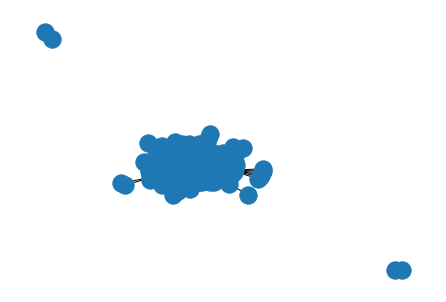

In [19]:
# Create an empty graph
G = nx.Graph()

# Loop through the rows in the dataset and add edges to the graph
for i, row in df.iterrows():
    # Get the source and target nodes
    source = row['sanctioning_state']
    target = row['sanctioned_state']
    
    # Add the edge to the graph
    G.add_edge(source, target, begin=row['begin'], end=row['end'])
nx.draw(G)

nx.write_gml(G, 'my_graph.gml')

AttributeError: module 'networkx' has no attribute 'to_csv'

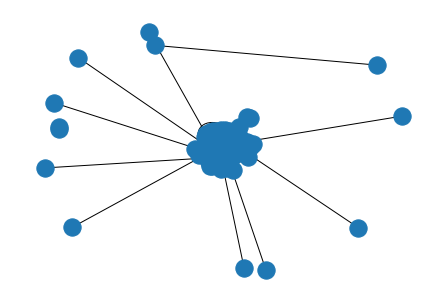

In [21]:
# Create an empty graph
G = nx.Graph()

# Loop through the rows in the dataset and add edges to the graph
for i, row in df.iterrows():
    # Get the source and target nodes
    source = row['sanctioning_state']
    target = row['sanctioned_state']
    
    # Add the edge to the graph with weight and type of sanction as edge attributes
    G.add_edge(source, target, weight=row['end'] - row['begin'], sanction_type={
               'trade': int(row['trade'] != 0), 'arms': int(row['arms'] != 0), 'military': int(row['military'] != 0), 'financial': int(row['financial'] != 0), 'travel': int(row['travel'] != 0), 'other': int(row['other'] != 0)})
nx.draw(G)

#nx.write_gml(G, 'my_graph1.gml')


In [23]:
#read gml to csvvvvv=-----------------------------------------


# import networkx as nx

# # Read the GML file into a graph object
# G = nx.read_gml('my_graph1.gml')

# # Write the edges to a CSV file
# with open('output_file.csv', 'w') as f:
#     f.write('source,target\n')  # Write the header row
#     for edge in G.edges():
#         f.write(f"{edge[0]},{edge[1]}\n")  # Write each edge as a row in the CSV file


In [40]:
new_df.fillna('NA', inplace=True)

In [30]:
# #------------------ MILITARY SANCTION SUCCESS--------------------#

# df=pd.read_excel("/Users/sahithirao/Desktop/NetworkScience/Project/GSDB_V3/GSDB_military_sanction_SUCCESS.xlsx")
# df

# # create a new empty dataframe
# new_df = pd.DataFrame(columns=df.columns)

# # iterate over the rows in the original dataframe
# for index, row in df.iterrows():
#     sanctions = row['sanctioned_state'].split(',')
#     sanctioning_states = row['sanctioning_state'].split(',')
#     for sanction in sanctions:
#         for sanctioning_state in sanctioning_states:
#             new_row = row.copy()
#             print(new_row)
#             new_row['sanctioned_state'] = sanction.strip()
#             new_row['sanctioning_state'] = sanctioning_state.strip()
            
#             new_df = pd.concat([new_df, new_row.to_frame().T], ignore_index=True)
# new_df.to_csv("GSDB_MILITARY_SUCCESS_1.csv")

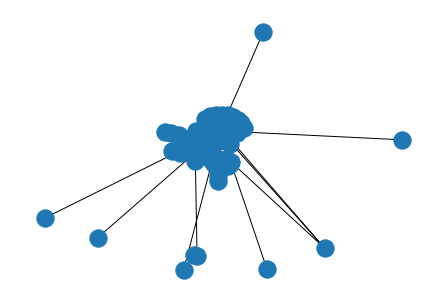

In [5]:
#military sanctions


df=pd.read_csv("GSDB_MILITARY_SUCCESS_1.csv")
G = nx.Graph()

for i, row in df.iterrows():
    source = row['sanctioning_state']
    target = row['sanctioned_state']
    
    G.add_edge(source, target, weight=row['end'] - row['begin'], sanction_type=row['objective'])

nx.draw(G)




In [17]:
#nx.write_gml(G, 'GSDB_MILITARY_SUCCESS.gml')

nx.number_of_edges(G)
#nx.number_of_nodes(G)

136

In [6]:
# 1975-1990

df75_90=df[df['begin']>=1975]
df75_90=df[df['end']<=1990]
df75_90

,Unnamed: 0.1,Unnamed: 0,case_id,sanctioned_state,sanctioning_state,begin,end,military,objective,success
0,0,0,1,China,Soviet Union,1960,1970,1,destab_regime,success_part
1,1,1,2,Congo,United States,1960,1963,1,territorial_conflict,success_total
2,2,1,2,Democratic Republic of the,United States,1960,1963,1,territorial_conflict,success_total
3,3,2,3,Dominican Republic,United States,1960,1961,1,destab_regime,success_total
4,4,3,4,Brazil,United States,1962,1964,1,destab_regime,success_total
5,5,4,5,Indonesia,United States,1963,1966,1,prevent_war,success_total
6,6,5,6,South Vietnam,United States,1963,1963,1,human_rights,success_total
7,7,6,7,India,United States,1965,1967,1,end_war,success_total
8,8,7,8,Greece,United States,1967,1972,1,human_rights,success_total
9,9,8,9,India,United States,1971,1971,1,end_war,success_total


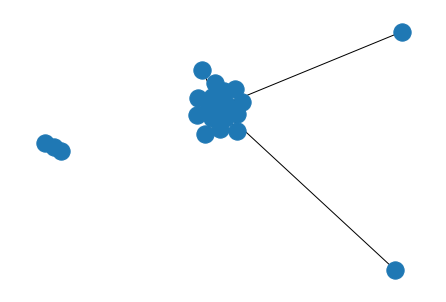

In [8]:
G1 = nx.Graph()

for i, row in df75_90.iterrows():
    source = row['sanctioning_state']
    target = row['sanctioned_state']
    
    G1.add_edge(source, target, weight=row['end'] - row['begin'], sanction_type=row['objective'])

nx.draw(G1)

In [11]:
#nx.write_gml(G1,"sanctions_military_75_90.gml")

nx.number_of_edges(G1)
nx.number_of_nodes(G1)

22

In [12]:
# 1995-2010

df95_10=df[df['begin']>=1995]
df95_10=df[df['end']<=2010]

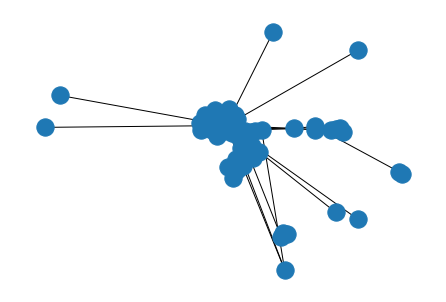

In [13]:


G2 = nx.Graph()

for i, row in df95_10.iterrows():
    #print("i",i,row)
    source = row['sanctioning_state']
    target = row['sanctioned_state']
    
    G2.add_edge(source, target, weight=row['end'] - row['begin'], sanction_type=row['objective'])

nx.draw(G2)



In [39]:
#nx.write_gml(G2,"sanctions_military_95_10.gml")

In [15]:
nx.number_of_edges(G2)
#nx.number_of_nodes(G2)

82

### OVERALL DATAA SANCTIONS

In [39]:
data = pd.read_csv('/Users/sahithirao/Desktop/NetworkScience/Project/GSDB1.csv')
df=data.copy(deep=True)
df.head()


,Unnamed: 0,case_id,sanctioning_state,sanctioned_state,begin,end,trade,arms,military,financial,...,travel_obj,other_obj,trade_suc,arms_suc,military_suc,financial_suc,travel_suc,other_suc,objective,success
0,0,1,Germany,German Democratic Republic,1949,1973,0,0,0,0,...,NaN,territorial_conflict,NaN,NaN,NaN,NaN,NaN,success_total,territorial_conflict,success_total
1,1,2,India,Pakistan,1949,1951,1,0,0,0,...,NaN,NaN,nego_settlement,NaN,NaN,NaN,NaN,NaN,policy_change,nego_settlement
2,2,3,United States,Bulgaria,1950,1966,0,0,0,0,...,NaN,destab_regime,NaN,NaN,NaN,NaN,NaN,failed,destab_regime,failed
3,3,4,United States,Bulgaria,1950,1959,0,0,0,0,...,destab_regime,NaN,NaN,NaN,NaN,NaN,success_part,NaN,destab_regime,success_part
4,4,5,United States,Bulgaria,1950,1963,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,success_part,NaN,NaN,destab_regime,success_part


In [42]:
# create new column sanction type
df['sanction_type'] = None

for i, row in df.iterrows():
    if row['trade'] == 1:
        df.loc[i, 'sanction_type'] = 'trade'
    elif row['arms'] == 1:
        df.loc[i, 'sanction_type'] = 'arms'
    elif row['military'] == 1:
        df.loc[i, 'sanction_type'] = 'military'
    elif row['financial'] == 1:
        df.loc[i, 'sanction_type'] = 'financial'
    elif row['travel'] == 1:
        df.loc[i, 'sanction_type'] = 'travel'
    elif row['other'] == 1:
        df.loc[i, 'sanction_type'] = 'other'


#-----alternate method to assign values for sanction type-----#
# import numpy as np

# conditions = [df['trade'] == 1, df['arms'] == 1, df['military'] == 1, df['financial'] == 1, df['travel'] == 1, df['other'] == 1]
# choices = ['trade', 'arms', 'military', 'financial', 'travel', 'other']
# df['sanction_type'] = np.select(conditions, choices)

#-----alternate method 2 to assign values for sanction type-----#
#df.loc[df['trade'] == 1, 'sanction_type'] = 'trade'


,Unnamed: 0,case_id,sanctioning_state,sanctioned_state,begin,end,trade,arms,military,financial,...,other_obj,trade_suc,arms_suc,military_suc,financial_suc,travel_suc,other_suc,objective,success,sanction_type
0,0,1,Germany,German Democratic Republic,1949,1973,0,0,0,0,...,territorial_conflict,NaN,NaN,NaN,NaN,NaN,success_total,territorial_conflict,success_total,other
1,1,2,India,Pakistan,1949,1951,1,0,0,0,...,NaN,nego_settlement,NaN,NaN,NaN,NaN,NaN,policy_change,nego_settlement,trade
2,2,3,United States,Bulgaria,1950,1966,0,0,0,0,...,destab_regime,NaN,NaN,NaN,NaN,NaN,failed,destab_regime,failed,other
3,3,4,United States,Bulgaria,1950,1959,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,success_part,NaN,destab_regime,success_part,travel
4,4,5,United States,Bulgaria,1950,1963,0,0,0,1,...,NaN,NaN,NaN,NaN,success_part,NaN,NaN,destab_regime,success_part,financial
5,5,6,CoCom,China,1950,1985,1,0,0,0,...,NaN,nego_settlement,NaN,NaN,NaN,NaN,NaN,destab_regime,nego_settlement,trade
6,6,7,New Zealand,China,1950,1956,1,0,0,0,...,NaN,failed,NaN,NaN,NaN,NaN,NaN,destab_regime,failed,trade
7,7,8,Organization of American States,China,1950,1985,1,0,0,0,...,NaN,failed,NaN,NaN,NaN,NaN,NaN,destab_regime,failed,trade
8,8,9,South Africa,China,1950,1985,1,0,0,0,...,NaN,failed,NaN,NaN,NaN,NaN,NaN,destab_regime,failed,trade
9,9,10,United Kingdom,China,1950,1956,1,0,0,0,...,NaN,failed,NaN,NaN,NaN,NaN,NaN,destab_regime,failed,trade


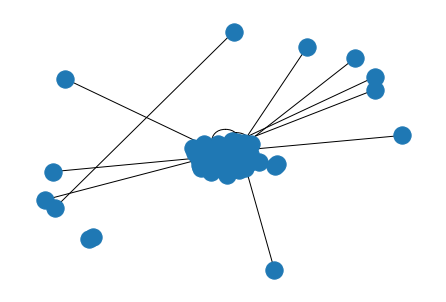

In [43]:
#create a graph
total_graph=nx.Graph()

for i,row in df.iterrows():
    source=row['sanctioned_state']
    target=row['sanctioning_state']
    total_graph.add_edge(source,target,weight=row['end']-row['begin'],sanction_type=row['sanction_type'])

nx.draw(total_graph)
    

In [44]:
#nx.write_gml(total_graph,"sanction_overall.gml")